2025-03-06 13:16:25,030 - src.data_collection - INFO - Fetching stock data for 5 tickers from 2010-01-01 to 2023-12-31


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed
2025-03-06 13:16:25,439 - src.data_collection - INFO - Raw stock data saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/stock_prices_2010-01-01_to_2023-12-31.csv
2025-03-06 13:16:25,439 - src.data_collection - INFO - Fetching Fama-French factors with daily frequency


Data columns: MultiIndex([( 'Close', 'GLD'),
            ( 'Close', 'IWM'),
            ( 'Close', 'QQQ'),
            ( 'Close', 'SPY'),
            ( 'Close', 'TLT'),
            (  'High', 'GLD'),
            (  'High', 'IWM'),
            (  'High', 'QQQ'),
            (  'High', 'SPY'),
            (  'High', 'TLT'),
            (   'Low', 'GLD'),
            (   'Low', 'IWM'),
            (   'Low', 'QQQ'),
            (   'Low', 'SPY'),
            (   'Low', 'TLT'),
            (  'Open', 'GLD'),
            (  'Open', 'IWM'),
            (  'Open', 'QQQ'),
            (  'Open', 'SPY'),
            (  'Open', 'TLT'),
            ('Volume', 'GLD'),
            ('Volume', 'IWM'),
            ('Volume', 'QQQ'),
            ('Volume', 'SPY'),
            ('Volume', 'TLT')],
           names=['Price', 'Ticker'])
Column levels: [['Close', 'High', 'Low', 'Open', 'Volume'], ['GLD', 'IWM', 'QQQ', 'SPY', 'TLT']]
Level 0 values: ['Close', 'High', 'Low', 'Open', 'Volume']
Level 1 values: 

2025-03-06 13:16:26,442 - src.data_collection - INFO - Raw FF factors zip saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/FF_factors_daily.zip
2025-03-06 13:16:26,562 - src.data_collection - INFO - Processed FF factors saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/processed/ff_factors_daily.csv
2025-03-06 13:16:26,565 - src.data_collection - INFO - Fetching Fed rate decisions from 2000 to present


Successfully processed Fama-French factors with shape: (25901, 5)


2025-03-06 13:16:26,804 - src.data_collection - INFO - Raw Fed decisions HTML saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/raw/fed_rate_decisions_page.html
2025-03-06 13:16:26,808 - src.data_collection - INFO - Processed Fed rate decisions saved to /Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/data/processed/fed_rate_decisions.csv
2025-03-06 13:16:26,808 - src.factor_modeling - INFO - Calculating daily returns
2025-03-06 13:16:26,810 - src.fed_analysis - INFO - Identifying Fed regimes with window size 3
2025-03-06 13:16:26,812 - src.optimization - INFO - Backtesting regime-based strategies
2025-03-06 13:16:26,812 - src.optimization - INFO - Creating daily regime data
/Users/gabescott/GitHub-Portfolio-Project/FF-FedTiming-Portfolio-Optimizer/src/optimization.py:107: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_regime 

Returns data shape: (3521, 5)
Fed regimes data shape: (187, 6)


2025-03-06 13:16:27,012 - src.optimization - INFO - Performing mean-variance optimization
2025-03-06 13:16:27,015 - src.optimization - INFO - Optimization results: Return=1.0000, Risk=0.0053, Sharpe=187.5984
2025-03-06 13:16:27,015 - src.optimization - INFO - Estimating covariance using ledoit-wolf method
2025-03-06 13:16:27,016 - src.optimization - INFO - Performing mean-variance optimization
2025-03-06 13:16:27,019 - src.optimization - INFO - Optimization results: Return=1.0000, Risk=0.0053, Sharpe=189.7978
2025-03-06 13:16:27,019 - src.optimization - INFO - Estimating covariance using ledoit-wolf method
2025-03-06 13:16:27,020 - src.optimization - INFO - Performing mean-variance optimization
2025-03-06 13:16:27,022 - src.optimization - INFO - Optimization results: Return=1.0000, Risk=0.0050, Sharpe=198.1352
2025-03-06 13:16:27,023 - src.optimization - INFO - Estimating covariance using ledoit-wolf method
2025-03-06 13:16:27,024 - src.optimization - INFO - Performing mean-variance op

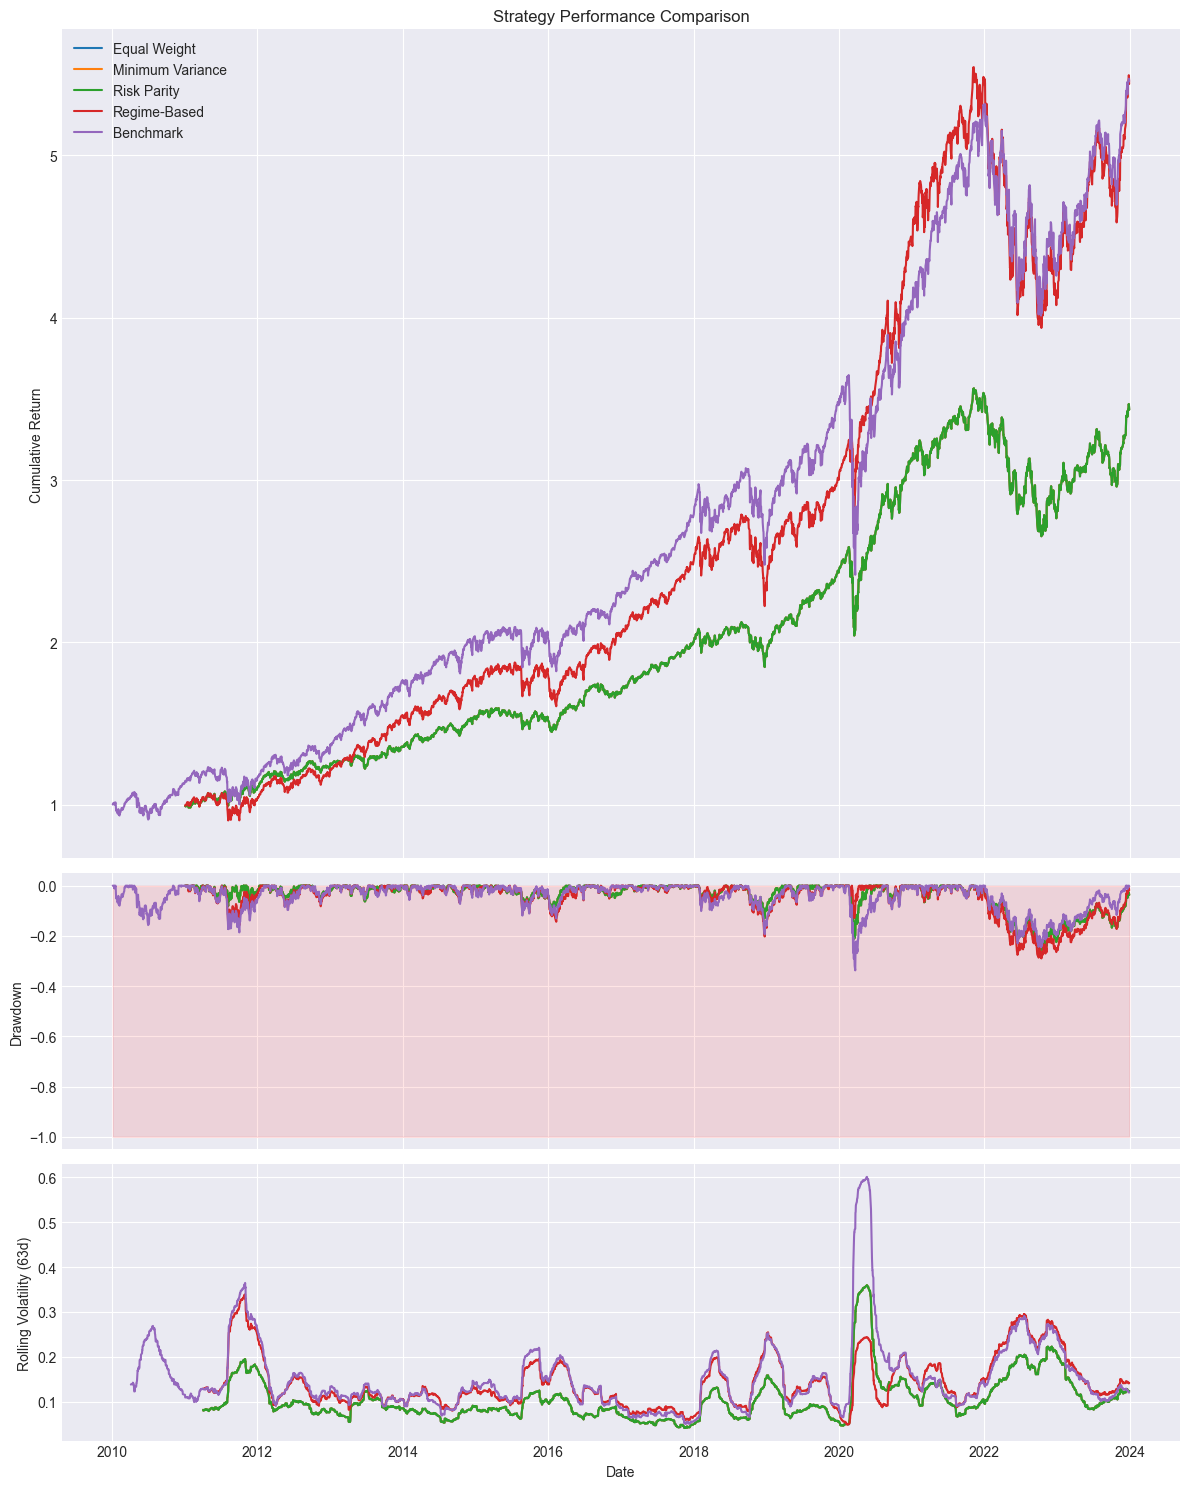

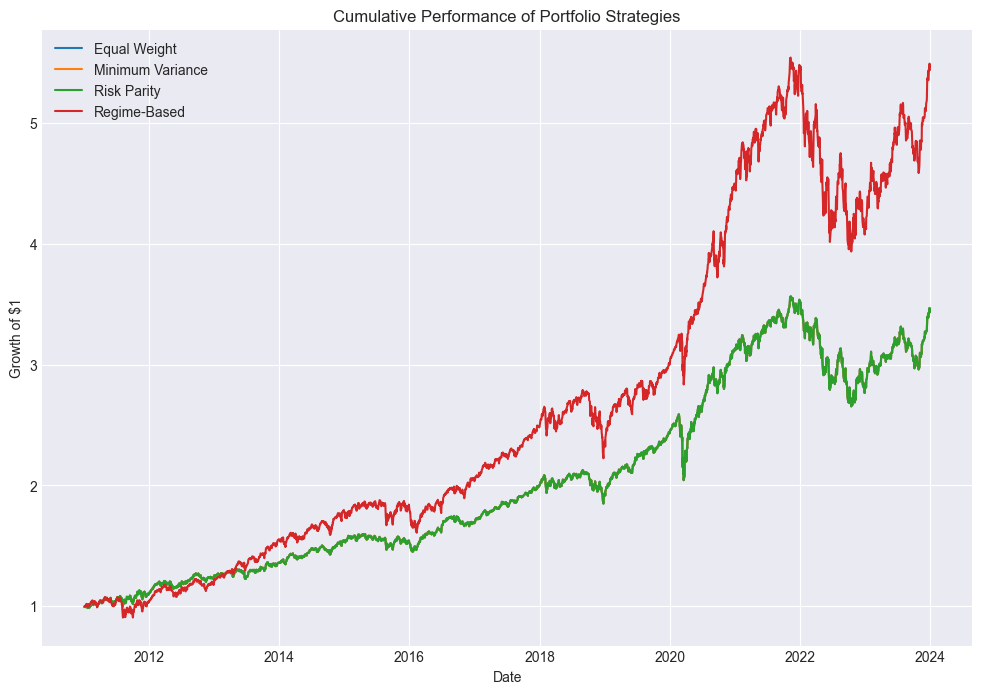

In [1]:
# Import necessary modules
from src.data_collection import fetch_stock_data, fetch_fama_french_factors, fetch_fed_rate_decisions
from src.factor_modeling import calculate_asset_returns
from src.fed_analysis import identify_fed_regimes
from src.optimization import backtest_regime_strategies
from src.visualization import create_portfolio_performance_dashboard, create_performance_summary_table

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import cvxpy as cp
from sklearn.covariance import LedoitWolf, OAS
import logging



# Fetch data
tickers = ['SPY', 'QQQ', 'IWM', 'GLD', 'TLT']
stock_data = fetch_stock_data(tickers, '2010-01-01', '2023-12-31')
ff_factors = fetch_fama_french_factors(frequency='daily')
fed_decisions = fetch_fed_rate_decisions()


# Calculate returns from price data
returns = calculate_asset_returns(stock_data)

# Identify Fed regimes
fed_regimes = identify_fed_regimes(fed_decisions)

# You can print these to verify they look correct
print(f"Returns data shape: {returns.shape}")
print(f"Fed regimes data shape: {fed_regimes.shape}")



backtest_results = backtest_regime_strategies(
    returns, 
    fed_regimes, 
    factor_data=ff_factors, 
    rebalance_freq=21
)

# Create performance dashboard
dashboard = create_portfolio_performance_dashboard(
    backtest_results['strategy_returns'],
    backtest_results['strategy_weights'],
    backtest_results['benchmark_returns']
)

# Create performance summary table
metrics_table = create_performance_summary_table(backtest_results['performance_metrics'])

# Create a comparison chart of cumulative returns
plt.figure(figsize=(12, 8))
for name, returns_series in backtest_results['strategy_returns'].items():
    cum_returns = (1 + returns_series).cumprod()
    plt.plot(cum_returns.index, cum_returns, label=name)
plt.title('Cumulative Performance of Portfolio Strategies')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True)
plt.show()